<a href="https://colab.research.google.com/github/Claptar/spatialMPFC/blob/main/DE/human_young_vs_old_pseudobulk/scanpy_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies and files

## Install dependencies

In [ ]:
!pip install scanpy[leiden] anndata2ri scikit-misc scvi-tools squidpy gseapy decoupler sc-toolbox --quiet

# Необходимо, чтобы конкретно прогрузился matplotlib
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.5/180.5 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 KB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 2.2 MB/s eta 0:00:0

## Imports

In [1]:
import warnings
import scanpy as sc
import gseapy
import decoupler
import squidpy as sq
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import json
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

Нужно подключить свой гугл диск

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_path = 'drive/MyDrive/Spatial project/results/'

In [4]:
de_dir_path = 'drive/MyDrive/Spatial project/results/DE/young_vs_old_scanpy/'

In [6]:
os.listdir(de_dir_path + 'scanpy')

['DE_L2.csv',
 'DE_L3.csv',
 'DE_L4.csv',
 'DE_L5.csv',
 'DE_L6.csv',
 'DE_WM.csv',
 'DE_L1.csv']

### DE results

In [11]:
# Load scanpy results
scanpy_DE = dict()

for file in os.listdir(de_dir_path + 'scanpy'):
    layer = file[3:].split('.')[0]
    df = pd.read_csv(de_dir_path + 'scanpy/' + file, index_col=1)
    df = df.iloc[:, 1:]
    # remove mito hb and rb genes
    mito = df.index.str.startswith('MT-')
    hb = df.index.str.contains(("^HB[AB]"))
    rb = df.index.str.contains(("^RP[LS]"))
    remove = mito | hb | rb
    df = df.loc[~remove]
    
    scanpy_DE[layer] = df

scanpy_DE.keys()

dict_keys(['L2', 'L3', 'L4', 'L5', 'L6', 'WM', 'L1'])

In [13]:
scanpy_DE['L1']

scores  logfoldchanges          pvals      pvals_adj  pct_nz_group  \
names                                                                           
TUBA1A  54.976944        4.230728   0.000000e+00   0.000000e+00      1.000000   
STMN2   52.180088        4.063926   0.000000e+00   0.000000e+00      0.993907   
YBX1    51.389565        5.320566   0.000000e+00   0.000000e+00      0.971059   
STMN1   48.683700        2.598272   0.000000e+00   0.000000e+00      0.996192   
TUBB2B  47.527230        4.016336   0.000000e+00   0.000000e+00      0.966489   
...           ...             ...            ...            ...           ...   
CST3   -37.346905       -1.405944  2.846409e-305  2.744934e-302      0.958873   
IDS    -38.161373       -5.588717   0.000000e+00   0.000000e+00      0.071592   
SNAP25 -39.830902       -2.649144   0.000000e+00   0.000000e+00      0.578827   
CLU    -44.428997       -2.166260   0.000000e+00   0.000000e+00      0.869002   
MT3    -48.278576       -2.100850   0.000000e+00   0.000000e+00      0.945164   

        pct_nz_reference  
names                     
TUBA1A          0.577672  
STMN2           0.423193  
YBX1            0.162484  
STMN1           0.700346  
TUBB2B          0.299005  
...                  ...  
CST3            0.996755  
IDS             0.712029  
SNAP25          0.852878  
CLU             0.976850  
MT3             0.998918  

[19287 rows x 6 columns]

### Load adata

In [14]:
# read young human adata object
human_young = sc.read_h5ad(dir_path + 'filtered_samples/human.h5ad')
print(human_young)

# add _young sufix to layer name
human_young.obs.label.replace({"L6a": "L6", "L6b": "L6"}, inplace=True)
human_young.obs.label = human_young.obs.label.astype('str') + '_young'

AnnData object with n_obs × n_vars = 15417 × 19966
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_pct_counts_ribo_colors', 'qc_total_counts_colors', 'spatial'
    obsm: 'spatial'


/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [15]:
# read young human adata object
human_old = sc.read_h5ad(dir_path + 'filtered_samples/spatial_libd_human.h5ad')
print(human_old)

# add _young sufix to layer name
human_old.obs.label = human_old.obs.label.astype('str') + '_old'

AnnData object with n_obs × n_vars = 42588 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_pct_counts_mt_colors', 'qc_pct_counts_ribo_colors', 'qc_total_counts_colors', 'spatial'
    obsm: 'spatial'


/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [16]:
# concat old and young files
adata = an.concat([human_young, human_old], merge='same',uns_merge="unique")
adata.obs_names_make_unique()
adata

/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 58005 × 19404
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_total_counts_colors', 'spatial', 'qc_pct_counts_mt_colors'
    obsm: 'spatial'

In [17]:
samples = list(adata.uns['spatial'].keys())
samples

['human_759',
 'human_j12',
 'human_j3',
 'human_j4',
 'human_j6',
 '151507',
 '151508',
 '151509',
 '151510',
 '151669',
 '151670',
 '151671',
 '151672',
 '151673',
 '151674',
 '151675',
 '151676']

In [18]:
del human_young, human_old

### Add diff. expr. results to adata

In [22]:
from sc_toolbox.tools import de_res_to_anndata

for layer in scanpy_DE.keys():
    label = layer + '_young'
    df = scanpy_DE[layer]
    df["gene_symbol"] = df.index
    df["label"] = label


    de_res_to_anndata(
            adata,
            df,
            groupby="label",
            score_col="scores",
            pval_col="pvals",
            pval_adj_col="pvals_adj",
            lfc_col="logfoldchanges",
            key_added="scanpy_" + label,
        )

### Preprocess

In [23]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [24]:
sc.pp.highly_variable_genes(
    adata=adata, flavor="seurat", 
    n_top_genes=4000, inplace=True,
    batch_key="sample_id")

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:17)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [25]:
sc.tl.pca(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:29)


In [26]:
mito = adata.var_names.str.startswith('MT-')
hb = adata.var_names.str.contains(("^HB[AB]"))
rb = adata.var_names.str.contains(("^RP[LS]"))
remove = mito | hb | rb
genes_to_remove = adata.var_names[remove].tolist()

keep = np.invert(remove)
print(sum(remove))

de_adata = adata[:,keep]
highly_variable_genes = adata.var[adata.var.highly_variable].index.tolist()

117


# Результаты дифф. экспрессии

In [37]:
def sign_de(de_results):
    sign_dict = dict()
    
    for layer, df in de_results.items():
        sign_dict[layer] = df[df.pvals < 0.05]
    return sign_dict

In [30]:
def de_summary(de_results):
    num, pval05, upreg, downreg = list(), list(), list(), list()

    for layer, df in de_results.items():
        num.append(df.shape[0])
        pval05.append(df[df.pvals < 0.05].shape[0])
        upreg.append(df[(df.pvals < 0.05) & (df.logfoldchanges > 0)].shape[0])
        downreg.append(df[(df.pvals < 0.05) & (df.logfoldchanges < 0)].shape[0])
    summary = pd.DataFrame([num, pval05, upreg, downreg], columns=de_results.keys(), index=['num', 'pval05', 'upreg', 'downreg'])
    return summary.T

## Простая статистика

In [42]:
de_summary(scanpy_DE)

num  pval05  upreg  downreg
L2  19287    8823   7567     1256
L3  19287   10940   9210     1730
L4  19287   10391   8895     1496
L5  19287   10266   8466     1800
L6  19287    8194   6771     1423
WM  19287    5795   1383     4412
L1  19287    6288   5774      514

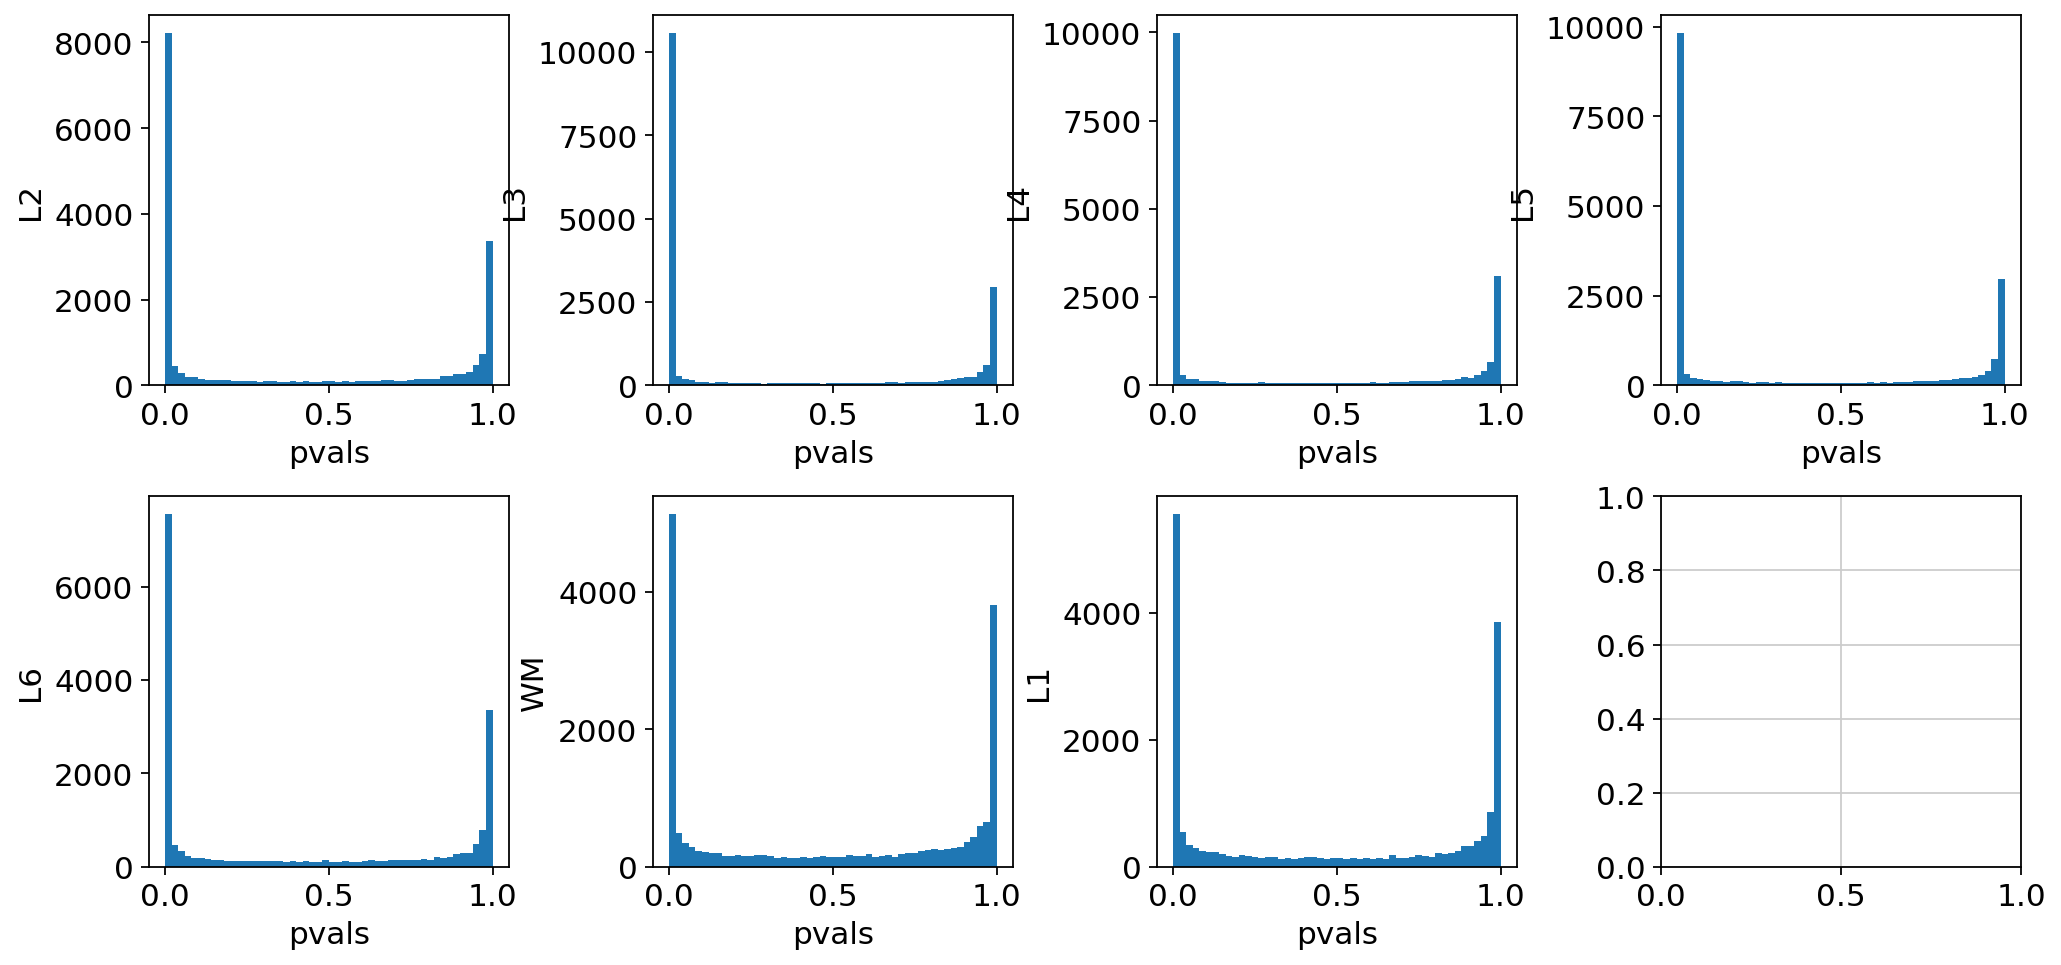

In [43]:
fig, axs = plt.subplots(2, 4, figsize=(15, 7), gridspec_kw={"wspace": 0.4, "hspace": 0.3})
for ax, (layer, df) in zip(axs.reshape(-1), scanpy_DE.items()):
    df.pvals.hist(bins=50, grid=False, ax=ax)
    ax.set_ylabel(layer)
    ax.set_xlabel('pvals')

## Jacard similarity

In [44]:
# Оставим только значимо дифф. эксп. гены
scanpy_sign = sign_de(scanpy_DE)

In [45]:
# Векторизуем
vectorize_de = pd.concat(scanpy_sign.values(), axis=1).notna().astype(int)['logfoldchanges']
vectorize_de.columns = scanpy_sign.keys()
vectorize_de = vectorize_de[["L1", "L2", "L3", "L4", "L5", "L6", "WM"]]
vectorize_de.head()

L1  L2  L3  L4  L5  L6  WM
names                             
TUBA1A   1   1   1   1   1   1   1
STMN2    1   1   1   1   1   1   1
TUBB2B   1   1   1   1   1   1   1
STMN1    1   1   1   1   1   1   1
TUBB     1   1   1   1   1   1   1

In [46]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(vectorize_de.T), columns=vectorize_de.columns, index=vectorize_de.columns)
pairwise_jaccard

L1        L2        L3        L4        L5        L6        WM
L1  1.000000  0.652198  0.559660  0.578106  0.576571  0.655464  0.410412
L2  0.652198  1.000000  0.785437  0.802777  0.799152  0.764151  0.418259
L3  0.559660  0.785437  1.000000  0.904894  0.862136  0.692825  0.431198
L4  0.578106  0.802777  0.904894  1.000000  0.889245  0.711641  0.426959
L5  0.576571  0.799152  0.862136  0.889245  1.000000  0.752421  0.427898
L6  0.655464  0.764151  0.692825  0.711641  0.752421  1.000000  0.422369
WM  0.410412  0.418259  0.431198  0.426959  0.427898  0.422369  1.000000

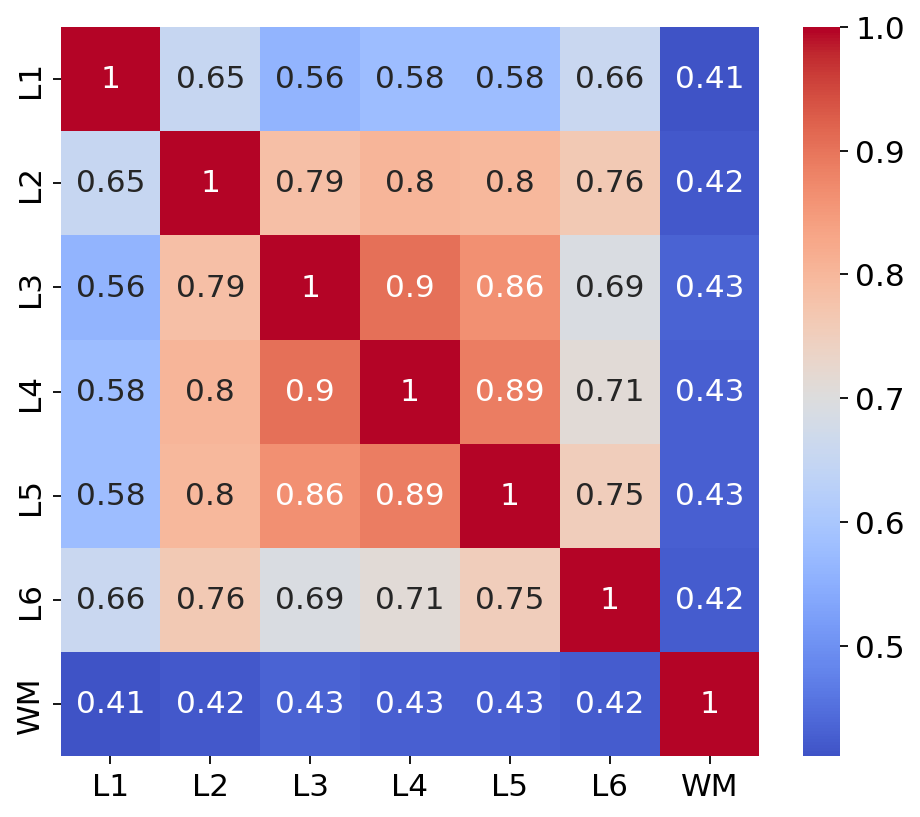

In [47]:
plt.figure(figsize=(7, 6))
sns.heatmap(pairwise_jaccard, annot=True, cmap = 'coolwarm', center=0.7)
plt.grid(False)

In [48]:
common_degenes = scanpy_sign['L1'].index & scanpy_sign['L2'].index & scanpy_sign['L3'].index &\
                 scanpy_sign['L4'].index & scanpy_sign['L5'].index & scanpy_sign['L6'].index & scanpy_sign['WM'].index
common_degenes

Index(['TUBA1A', 'STMN2', 'YBX1', 'STMN1', 'TUBB2B', 'TUBB2A', 'EEF1A1',
       'TUBB', 'DPYSL3', 'CD24',
       ...
       'MTRNR2L1', 'GFAP', 'PTGDS', 'CKB', 'MBP', 'CST3', 'IDS', 'SNAP25',
       'CLU', 'MT3'],
      dtype='object', name='names', length=2947)

# Визуализация

Нужна функция для подсчёта процента спотов экспрессирующих ген в какой-либо группе

In [49]:
def calculate_pct_group(adata, group):
    for value in adata.obs[group].unique():
        mask = (adata.obs[group] == value)
        value_pct = adata[mask].X.getnnz(axis=0) / adata[mask].X.shape[0]
        adata.var["pct_" + value] = value_pct

In [50]:
calculate_pct_group(adata, 'sample_id')
calculate_pct_group(adata, 'label')
adata.var.head()

feature_types     mt     hb   ribo  highly_variable     means  \
OR4F5   Gene Expression  False  False  False            False  0.000000   
OR4F29  Gene Expression  False  False  False            False  0.000000   
OR4F16  Gene Expression  False  False  False            False  0.000000   
SAMD11  Gene Expression  False  False  False             True  0.018350   
NOC2L   Gene Expression  False  False  False            False  0.379769   

        dispersions  dispersions_norm  highly_variable_nbatches  \
OR4F5      0.000000          0.000000                         0   
OR4F29     0.000000          0.000000                         0   
OR4F16     0.000000          0.000000                         0   
SAMD11     1.512745          0.794882                        11   
NOC2L      1.275595         -0.590589                         0   

        highly_variable_intersection  ...  pct_L1_young  pct_L6_young  \
OR4F5                          False  ...      0.000000      0.000000   
OR4F29                         False  ...      0.000000      0.000000   
OR4F16                         False  ...      0.000000      0.000000   
SAMD11                         False  ...      0.012186      0.003392   
NOC2L                          False  ...      0.123382      0.254381   

        pct_L4_young  pct_L1_old  pct_L3_old  pct_WM_old  pct_L6_old  \
OR4F5       0.000000    0.000000    0.000000    0.000000    0.000000   
OR4F29      0.000000    0.000000    0.000000    0.000000    0.000000   
OR4F16      0.000000    0.000000    0.000000    0.000000    0.000000   
SAMD11      0.007692    0.006058    0.004150    0.013336    0.006702   
NOC2L       0.458242    0.061662    0.145442    0.095884    0.150302   

        pct_L5_old  pct_L2_old  pct_L4_old  
OR4F5     0.000000    0.000000    0.000000  
OR4F29    0.000000    0.000000    0.000000  
OR4F16    0.000000    0.000000    0.000000  
SAMD11    0.005294    0.002559    0.004961  
NOC2L     0.178996    0.144424    0.167442  

[5 rows x 41 columns]

## Общие гены которые отличают молодых от взрослых

Отберем гены, которые являются дифф. экспр. во всех слоях и встречаются в более чем половине спотов образцов

In [51]:
columns = adata.var.columns
sample_id_pct_columns = columns[(columns.str.contains("pct")) & (~columns.str.contains("L"))]
layer_pct_columns = columns[columns.str.contains("L")]

In [52]:
mask = (adata.var[sample_id_pct_columns].min(axis=1) > 0.5)
common_highpct_genes = adata.var.loc[common_degenes][mask].index
common_highpct_genes

<ipython-input-52-f82b2fa134e7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  common_highpct_genes = adata.var.loc[common_degenes][mask].index


Index(['TUBA1A', 'STMN2', 'STMN1', 'TUBB2A', 'EEF1A1', 'TUBB', 'GPM6A',
       'TMSB10', 'CCNI', 'RACK1', 'UBA52', 'TPT1', 'ACTG1', 'BASP1', 'C1orf61',
       'NACA', 'MAP1B', 'RTN1', 'EEF2', 'PFDN5', 'MAP2', 'FAU', 'TMSB4X',
       'UCHL1', 'GNB1', 'C4orf48', 'FXYD6', 'NDFIP1', 'SERINC1', 'SARAF',
       'DSTN', 'PPP2R1A', 'YWHAZ', 'PTMA', 'KLC1', 'DPYSL2', 'EIF4A2', 'CALM1',
       'YWHAG', 'HSP90AA1', 'ENC1', 'ELOB', 'ATP5MD', 'C9orf16', 'CFL1',
       'MYL6', 'CLSTN1', 'APP', 'CPE', 'UQCRB', 'RTN4', 'APLP1', 'BEX3',
       'HINT1', 'FTL', 'EIF1', 'SKP1', 'UBB', 'RTN3', 'ATP1B1', 'ACTB',
       'PEBP1', 'GUK1', 'ITM2B', 'YWHAH', 'COX6A1', 'PSAP', 'SELENOW', 'GAPDH',
       'NDUFA4', 'COX4I1', 'COX6C', 'CKB', 'CST3', 'CLU', 'MT3'],
      dtype='object', name='names')

In [65]:
pretty_genes_young = ['TUBA1A', 'STMN2', 'STMN1', 'TUBB2A', 'EEF1A1', 'TUBB', 'GPM6A',
       'TMSB10', 'CCNI', 'RACK1', 'UBA52', 'TPT1', 'ACTG1', 'BASP1', 'C1orf61',
       'NACA', 'MAP1B', 'RTN1', 'EEF2', 'PFDN5']

In [66]:
pretty_genes_old = ['SKP1', 'UBB', 'RTN3', 'ATP1B1', 'ACTB',
       'PEBP1', 'GUK1', 'ITM2B', 'YWHAH', 'COX6A1', 'PSAP', 'SELENOW', 'GAPDH',
       'NDUFA4', 'COX4I1', 'COX6C', 'CKB', 'CST3', 'CLU', 'MT3']

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


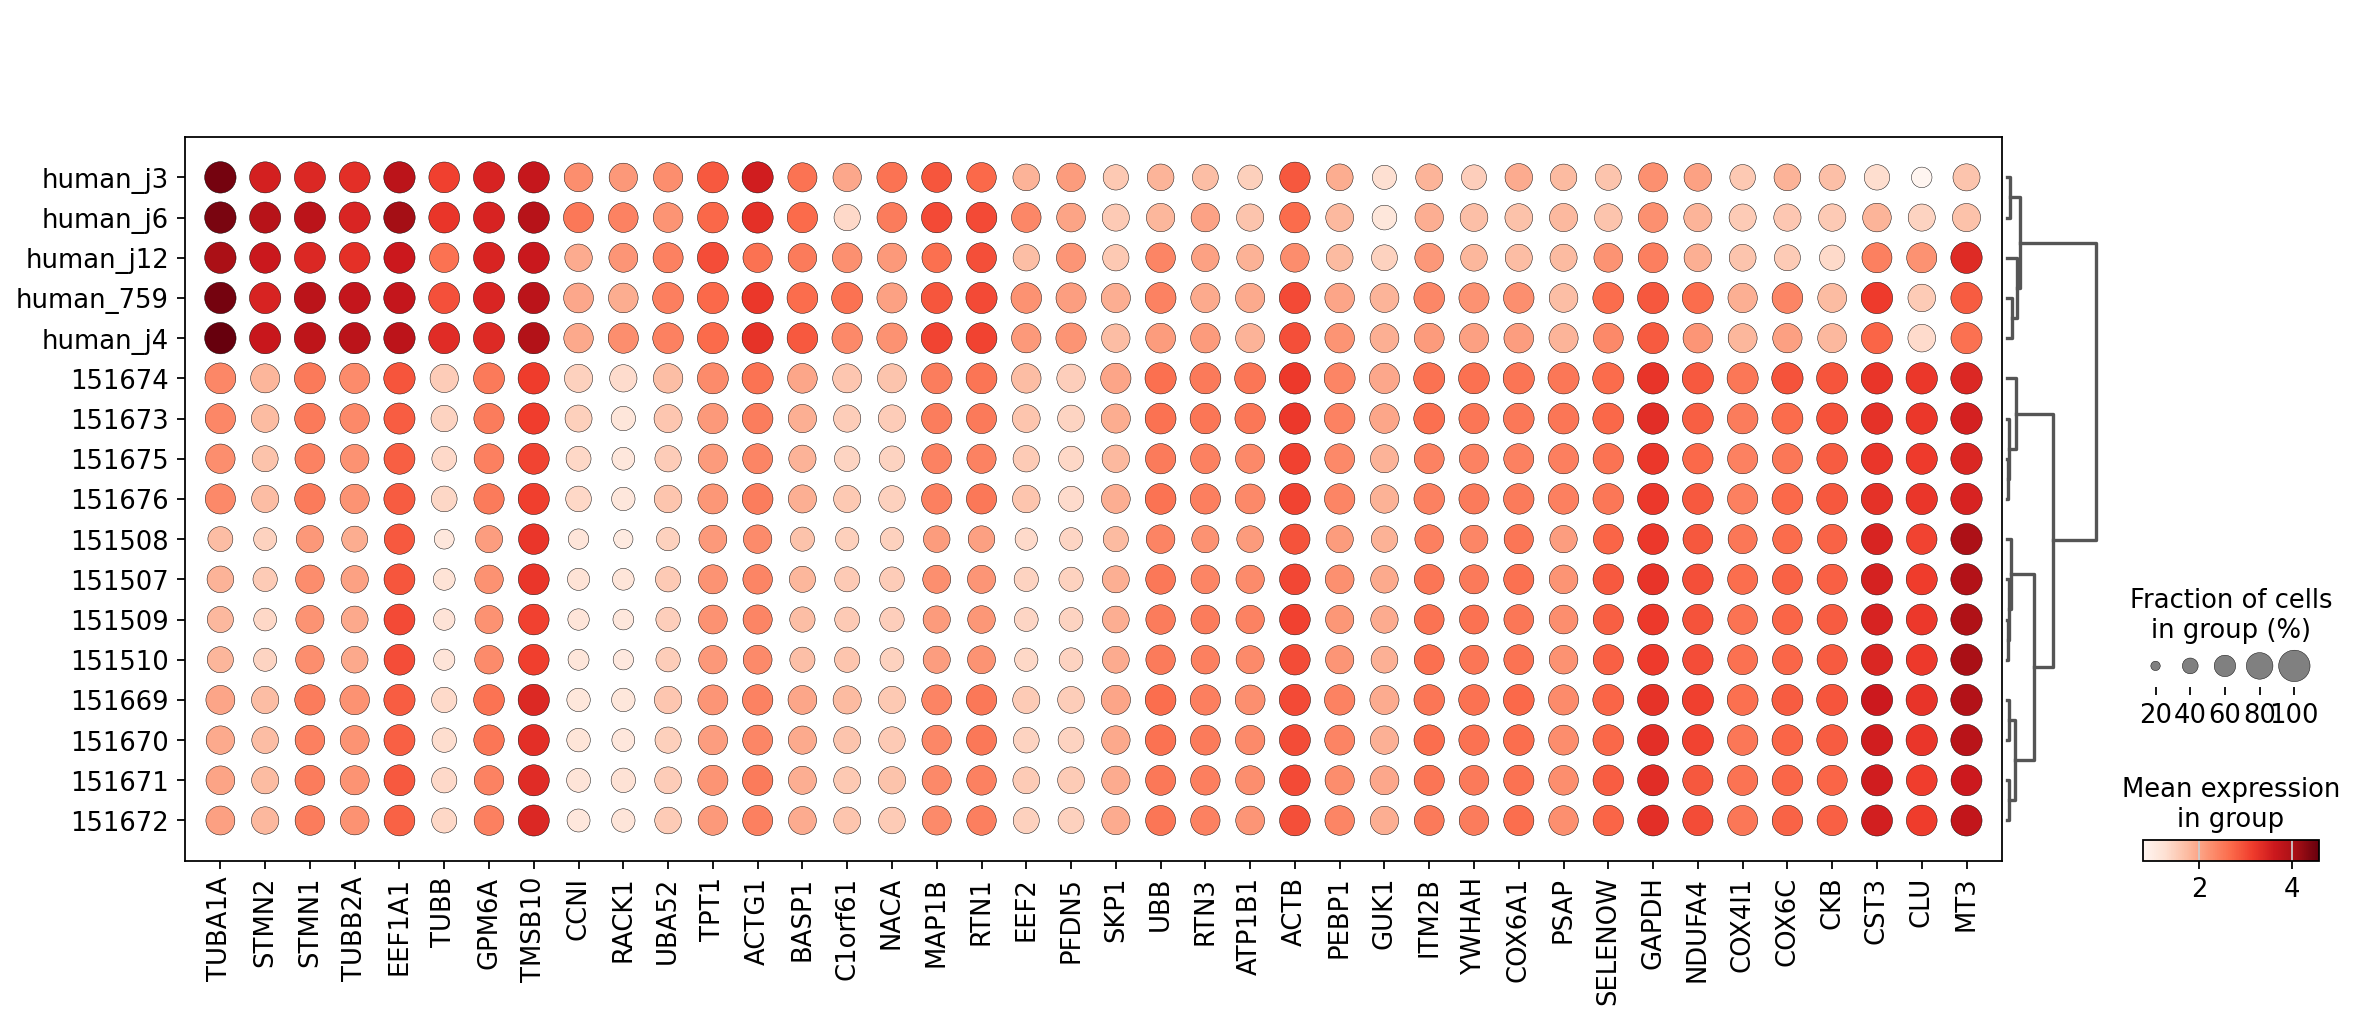

In [68]:
sc.pl.dotplot(adata, pretty_genes_young + pretty_genes_old, groupby='sample_id', dendrogram=True)

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


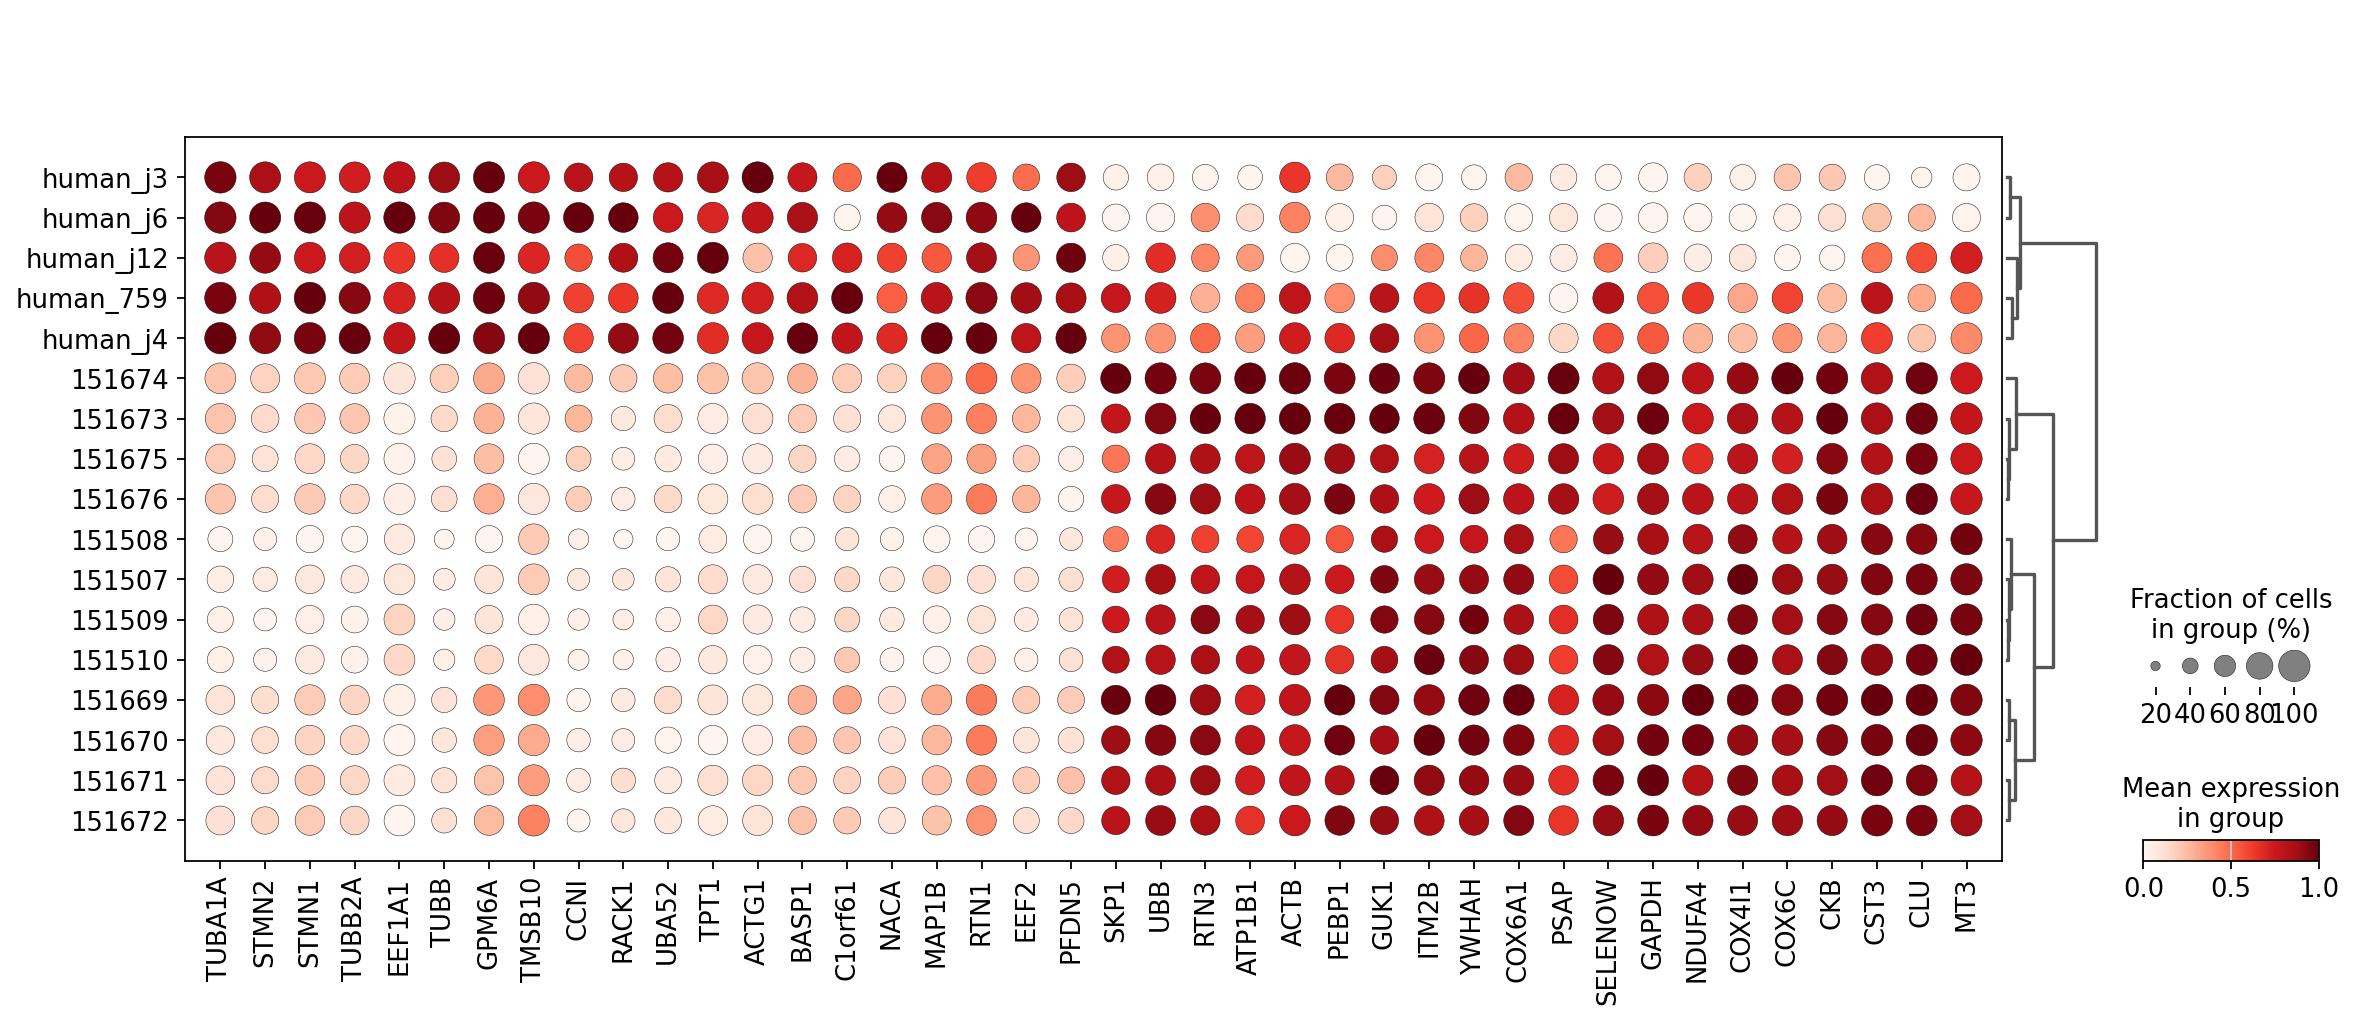

In [69]:
sc.pl.dotplot(adata, pretty_genes_young + pretty_genes_old, groupby='sample_id', standard_scale='var', dendrogram=True)

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


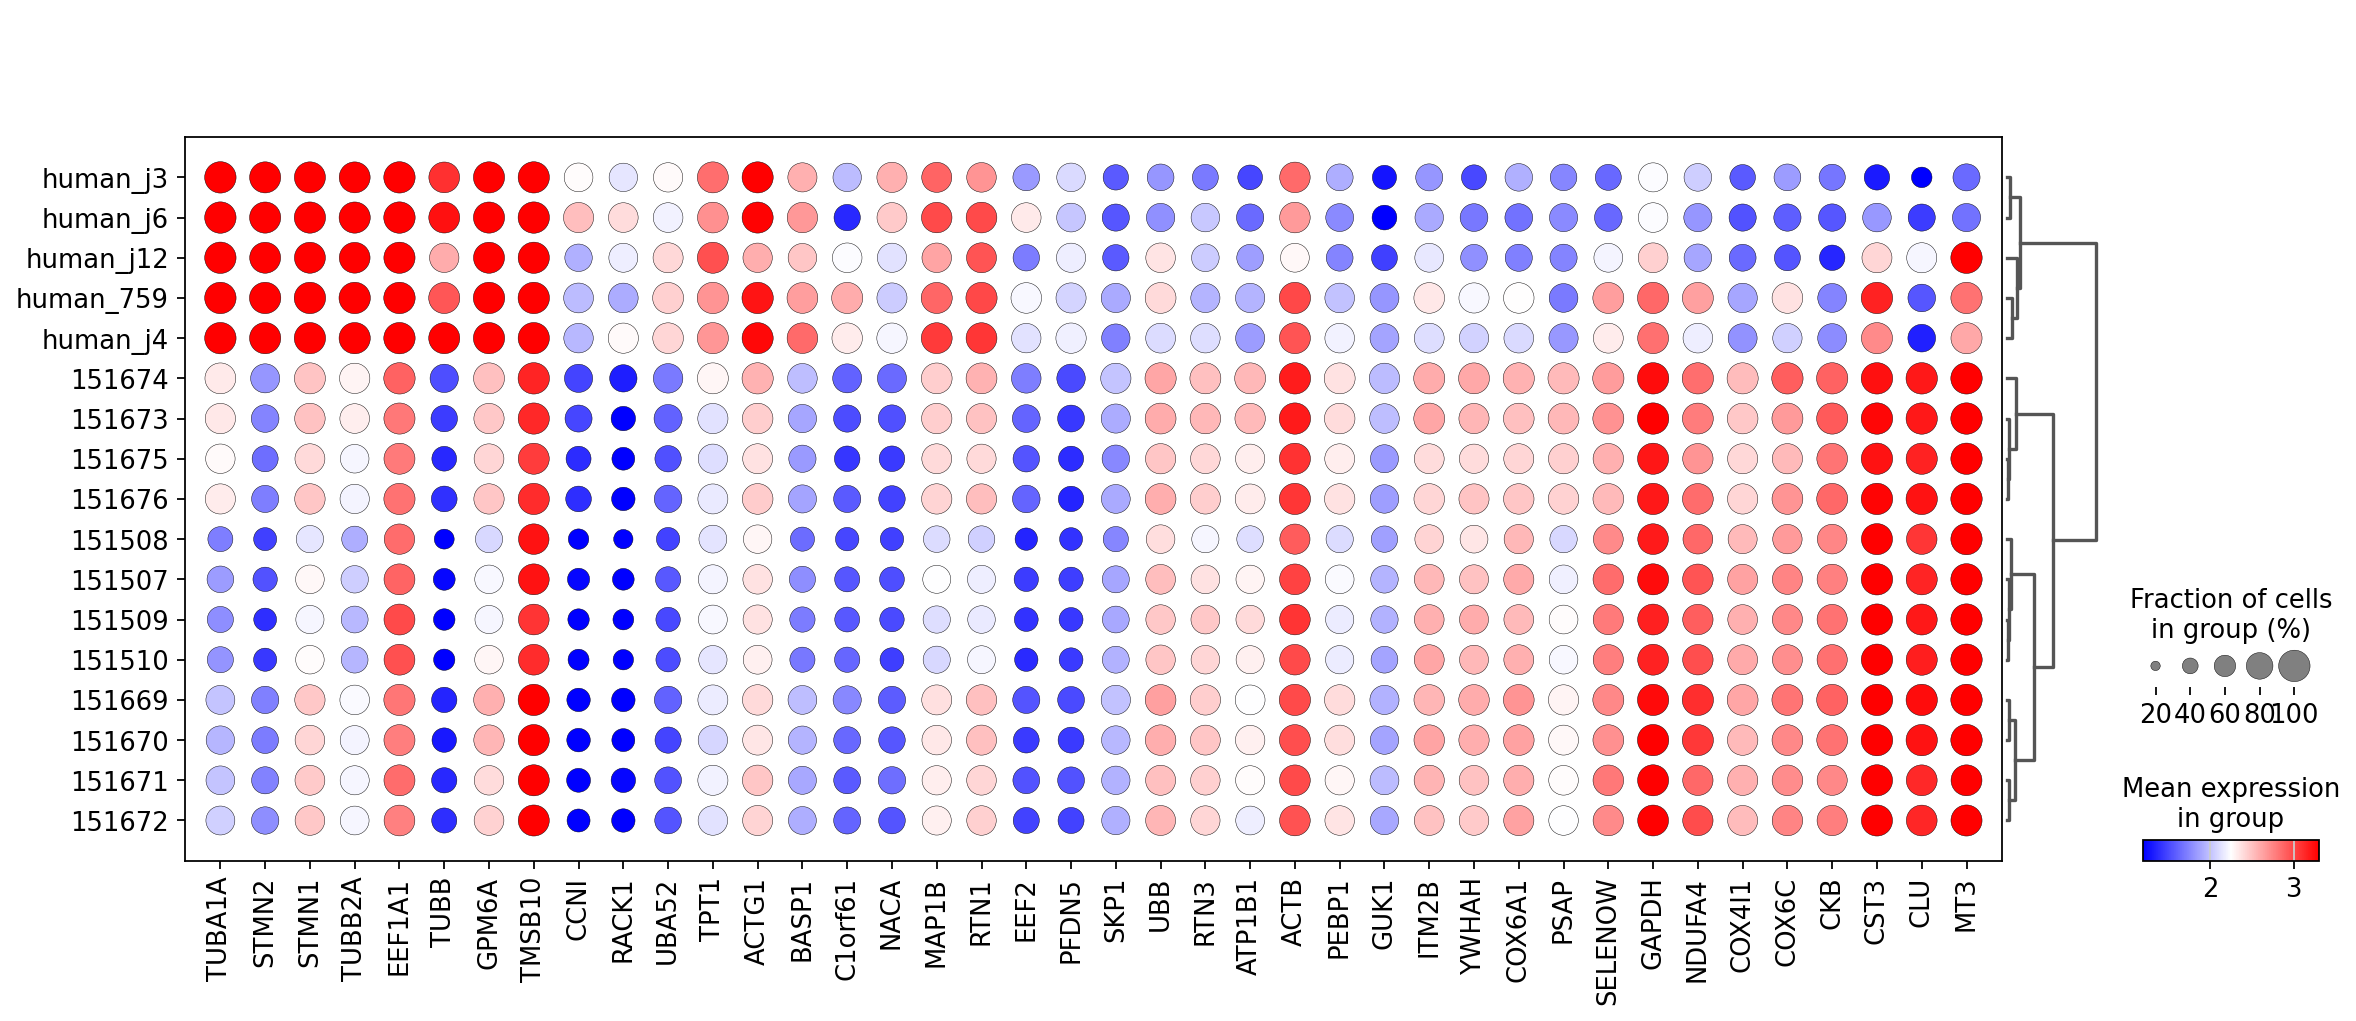

In [72]:
sc.pl.dotplot(adata, pretty_genes_young + pretty_genes_old, groupby='sample_id', cmap='bwr', vmin=1.2, vmax=3.3, dendrogram=True)

Заметим, что для некоторых генов `human_759` тянется к взрослым образцам

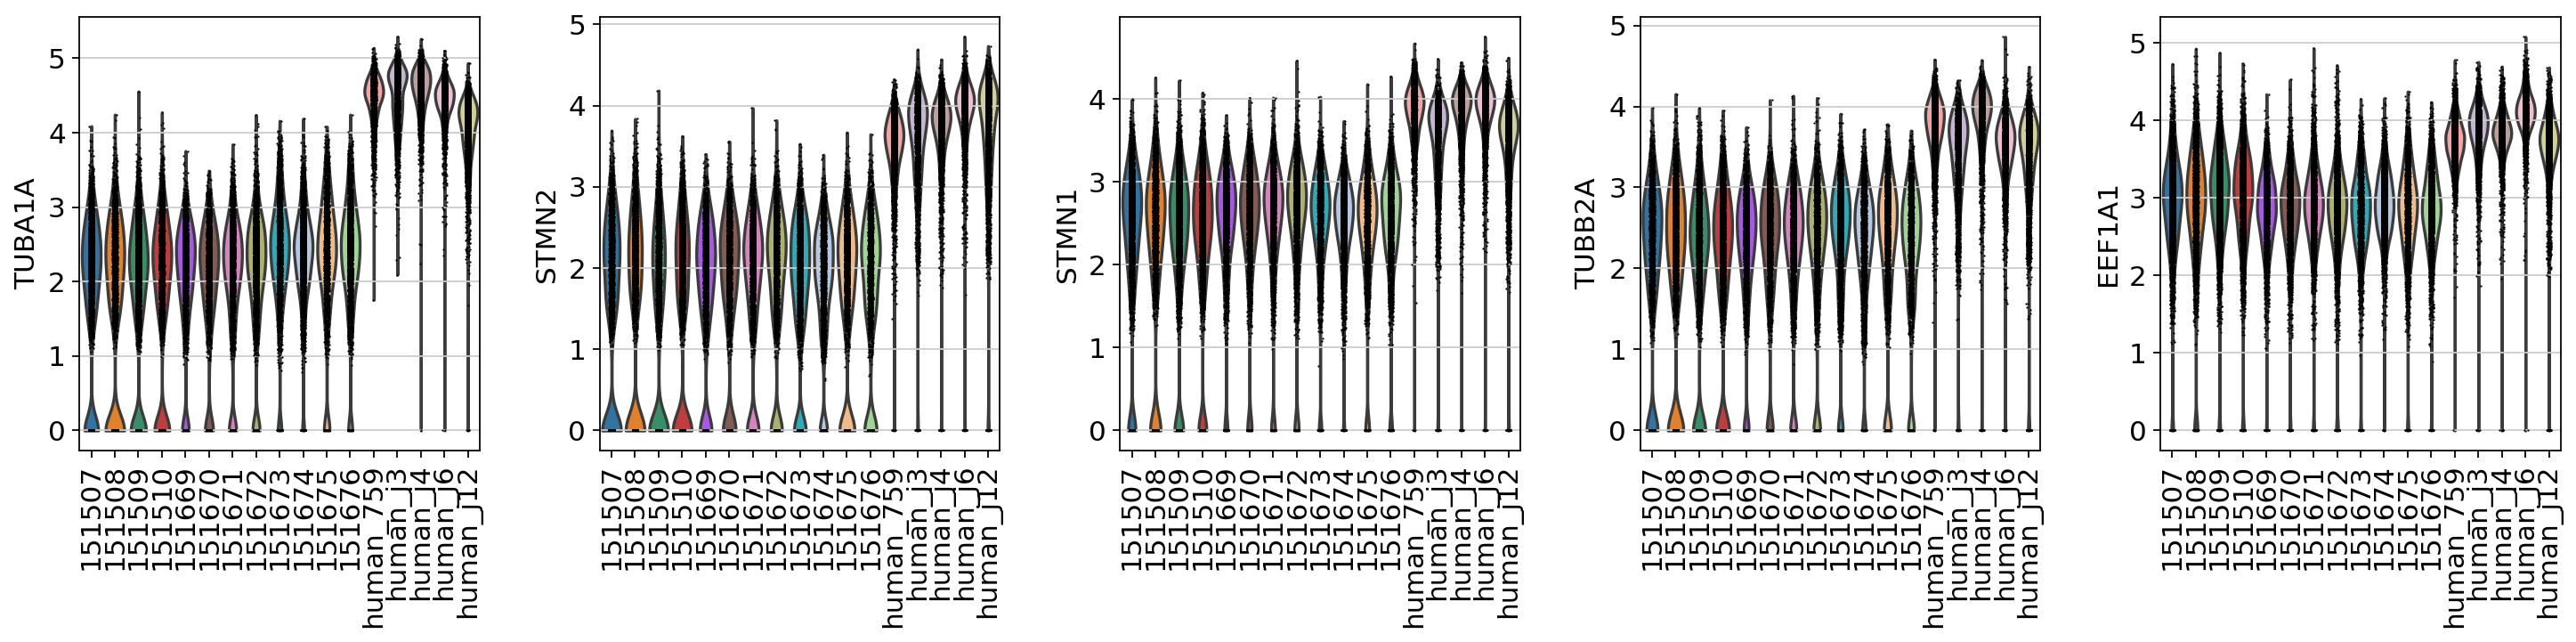

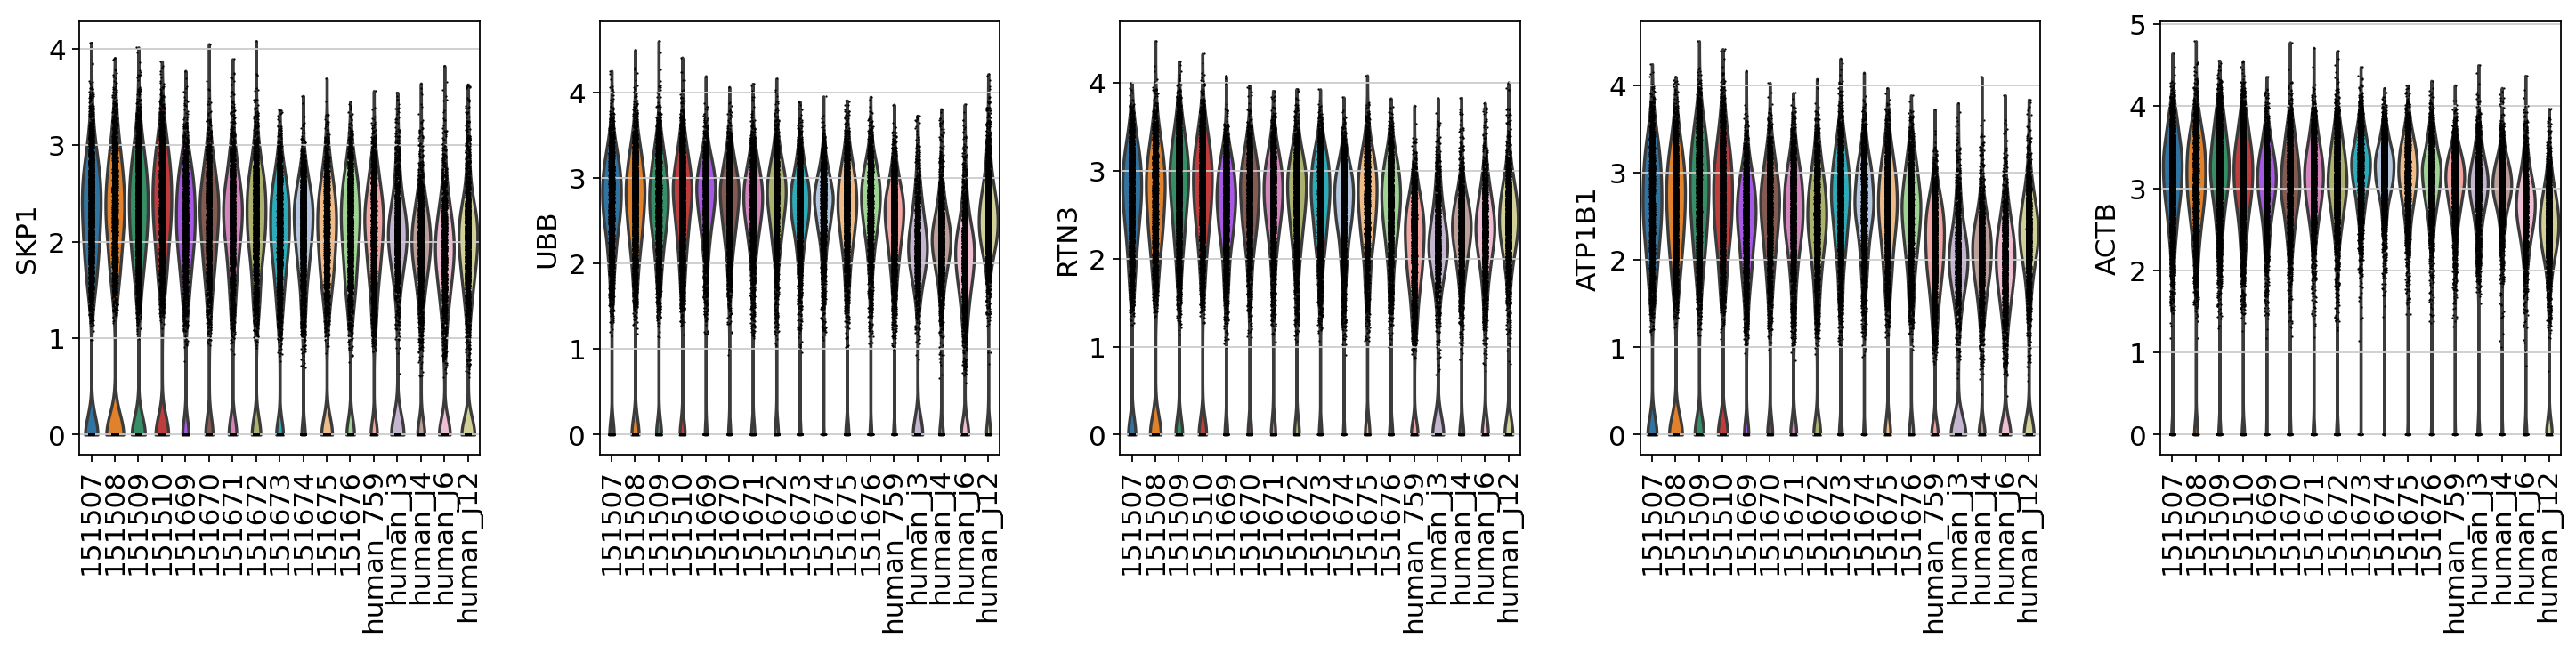

In [73]:
sc.pl.violin(adata, pretty_genes_young[:5], groupby='sample_id', rotation=90)
sc.pl.violin(adata, pretty_genes_old[:5], groupby='sample_id', rotation=90)

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


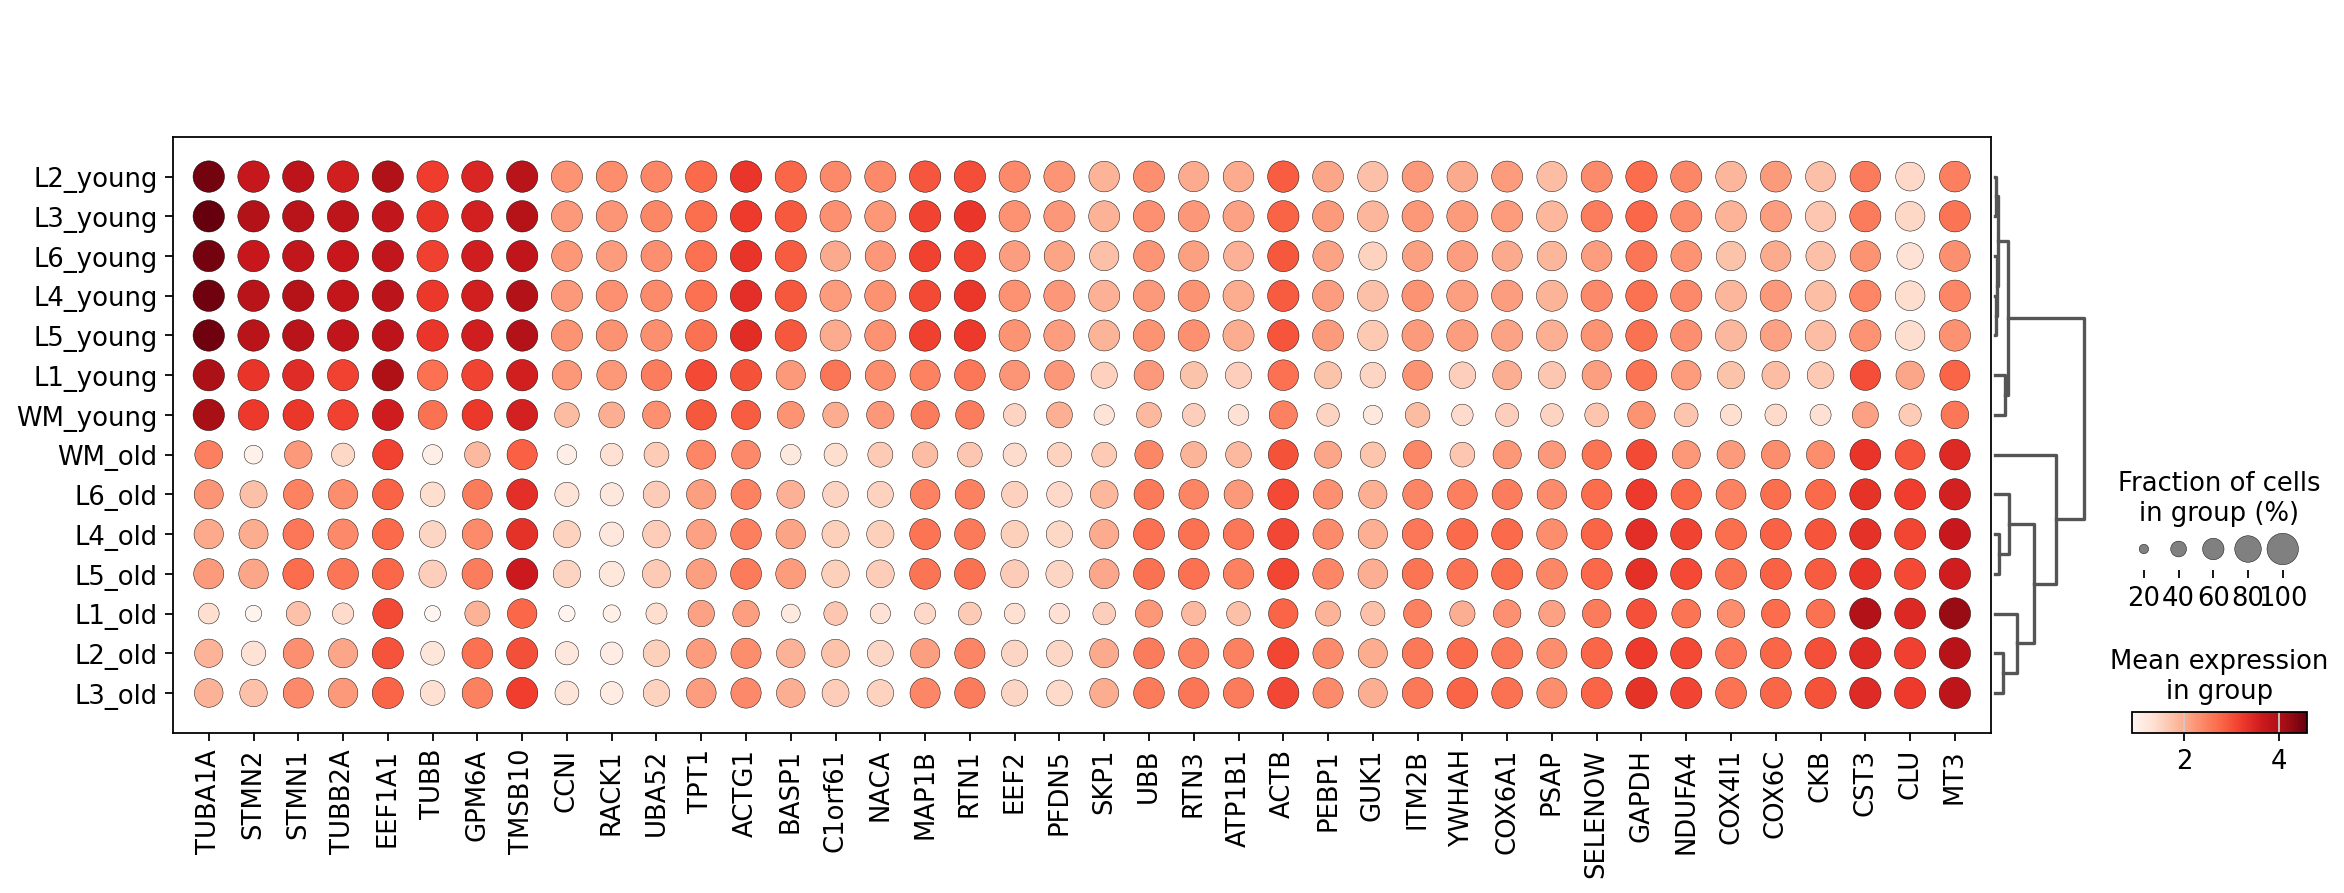

In [74]:
order = ["L1_young", "L2_young", "L3_young", "L4_young", "L5_young", "L6_young", "WM_young",
         "L1_old", "L2_old", "L3_old", "L4_old", "L5_old", "L6_old", "WM_old"]
sc.pl.dotplot(adata, pretty_genes_young + pretty_genes_old, groupby='label', categories_order=order, dendrogram=True)

categories: 151507, 151508, 151509, etc.
var_group_labels: L1_young


/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


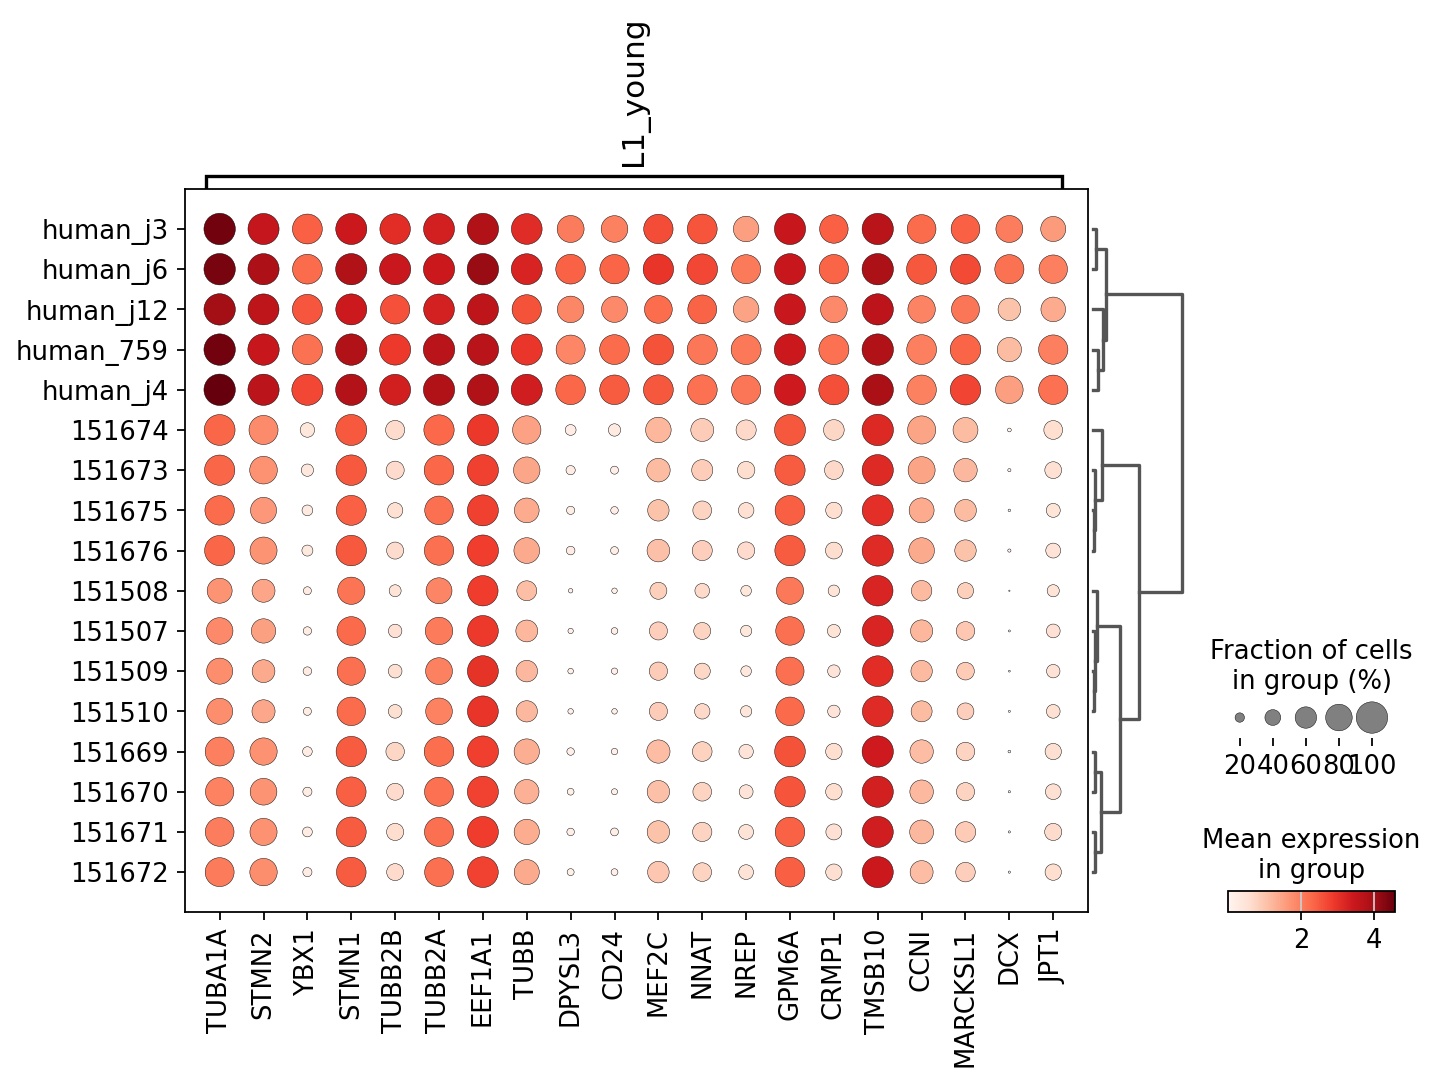

In [76]:
sc.pl.rank_genes_groups_dotplot(adata, groupby="sample_id", key='scanpy_L1_young', n_genes=20)

## Слоеспецифичные гены которые отличают молодых от взрослых

In [60]:
unique_degenes = dict()
for layer in scanpy_sign.keys():
    unique_layer_degenes = list(set(scanpy_sign[layer].index) - set(common_degenes))
    unique_degenes[layer] = unique_layer_degenes

In [61]:
columns = adata.var.columns
sample_id_pct_columns = columns[(columns.str.contains("pct")) & (~columns.str.contains("L"))]
layer_pct_columns = columns[columns.str.contains("L")]

In [62]:
top_unique_genes = list()
for layer in sorted(scanpy_sign.keys()):
    col = layer_pct_columns
    mask = (adata.var[col].mean(axis=1) > 0.4)
    unique_highpct_genes = adata.var.loc[unique_degenes[layer]][mask].index
    top5genes = scanpy_sign[layer].loc[unique_highpct_genes].sort_values("logfoldchanges", key=np.abs, ascending=False).index.tolist()[:5]
    top_unique_genes += top5genes

<ipython-input-62-c72eef105b59>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_highpct_genes = adata.var.loc[unique_degenes[layer]][mask].index
<ipython-input-62-c72eef105b59>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_highpct_genes = adata.var.loc[unique_degenes[layer]][mask].index
<ipython-input-62-c72eef105b59>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_highpct_genes = adata.var.loc[unique_degenes[layer]][mask].index
<ipython-input-62-c72eef105b59>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_highpct_genes = adata.var.loc[unique_degenes[layer]][mask].index
<ipython-input-62-c72eef105b59>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_highpct_genes = adata.var.loc[unique_degenes[layer]][mask].index
<ipython-input-62-c72eef105b59>:5: UserWarning: Boolean Series key will be 

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


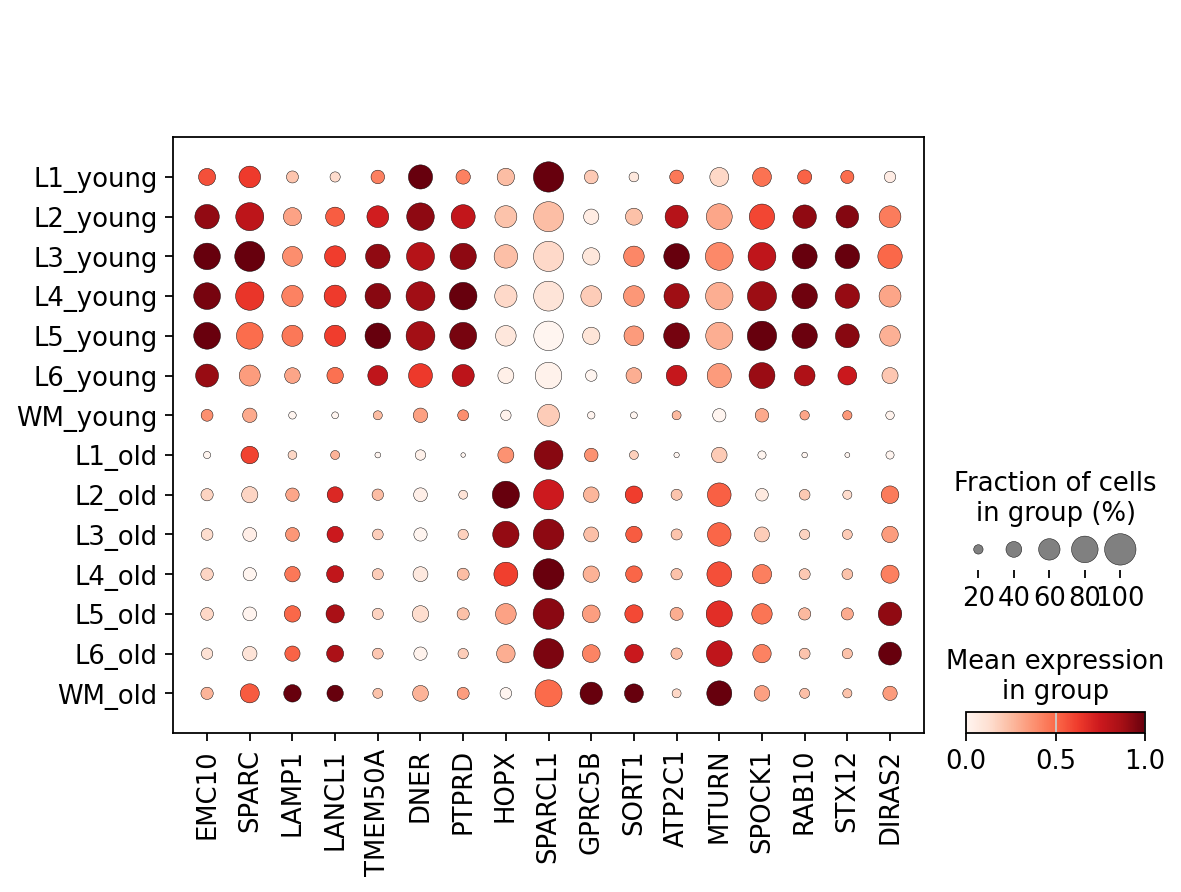

In [78]:
order = ["L1_young", "L2_young", "L3_young", "L4_young", "L5_young", "L6_young", "WM_young",
         "L1_old", "L2_old", "L3_old", "L4_old", "L5_old", "L6_old", "WM_old"]
sc.pl.dotplot(adata, list(set(top_unique_genes)), groupby='label', categories_order=order, standard_scale='var')